In [2]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from ggplot import *

import rating_utils


%matplotlib inline

### 1. Data processing
We load the training data and split it into training and test set

In [3]:
data = pd.read_csv('data/12-13.csv')

indices = np.random.rand(len(data)) < 0.8

train = data[indices].reset_index()
test = data[~indices].reset_index()

print rating_utils.get_teams(data)

print len(train), len(test)

['Washington Wizards' 'Dallas Mavericks' 'Boston Celtics'
 'Sacramento Kings' 'Houston Rockets' 'Memphis Grizzlies'
 'San Antonio Spurs' 'Denver Nuggets' 'Golden State Warriors'
 'Los Angeles Lakers' 'Indiana Pacers' 'Oklahoma City Thunder'
 'Milwaukee Bucks' 'Chicago Bulls' 'Los Angeles Clippers' 'Utah Jazz'
 'Miami Heat' 'Portland Trail Blazers' 'Detroit Pistons' 'Toronto Raptors'
 'New Orleans Hornets' 'Charlotte Bobcats' 'Cleveland Cavaliers'
 'Philadelphia 76ers' 'Atlanta Hawks' 'Phoenix Suns'
 'Minnesota Timberwolves' 'New York Knicks' 'Orlando Magic' 'Brooklyn Nets']
971 258


Let's plot the score distribution

/home/young/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
stat_bin: binwidth defaulted to range/30.
    Use 'binwidth = x' to adjust this.


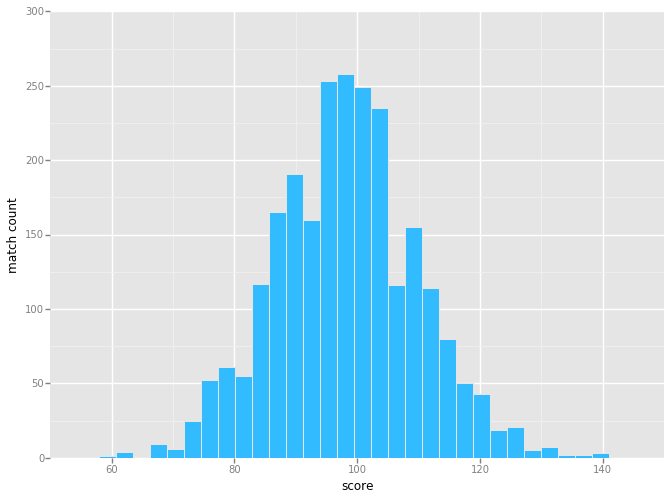

<ggplot: (8760638696537)>

In [4]:
ggplot(pd.DataFrame({'score': data['HomePTS'].append(data['VisitorPTS'])}), aes(x='score')) \
    + geom_histogram(fill='#33bbff') \
    + ylab('match count')

### 2. Fit and test Massey's method
We fit and test Massey's method.
The ratings are:

In [5]:
massey_model = rating_utils.MasseyMethod()
massey_model.fit(train, rating_utils.get_teams(data))
massey_model.ratings

array([-2.9761933 , -0.6792767 , -1.61629121, -5.13894117,  3.22753254,
        4.23183028,  6.38189607,  4.7561846 ,  0.54156335,  2.01012078,
        3.67130966,  9.33027998, -1.56408606,  0.58278001,  5.99388409,
        0.26810495,  6.8864326 , -2.29489974, -3.92489896, -2.52148207,
       -3.05411477, -9.10561275, -3.52146984, -3.69958985,  0.31366047,
       -6.37629513, -1.17641923,  3.2902164 , -5.88107386,  2.04484888])

We can plot out a histogram for the ratings

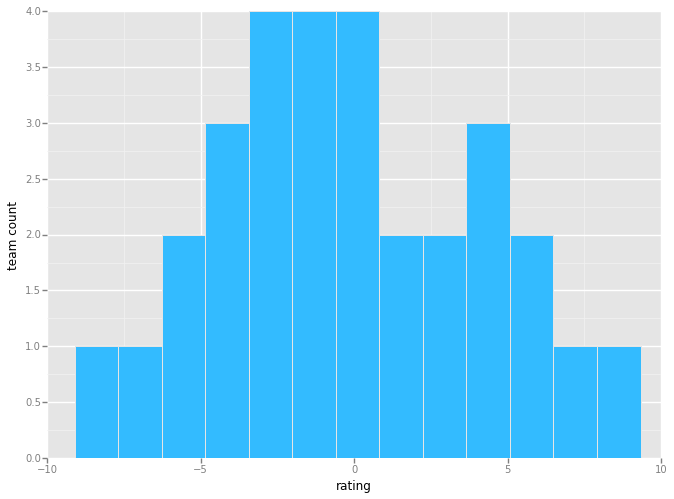

<ggplot: (8760520327957)>

In [6]:
# plt.hist(massey_model.ratings, bins=15)
ggplot(pd.DataFrame({'rating': massey_model.ratings}), aes(x='rating')) \
    + geom_histogram(binwidth=1.4, fill='#33bbff') \
    + ylab('team count')

We now compute the prediction error rate on training and test set

In [7]:
print massey_model.test_error_rate(train), massey_model.test_error_rate(test)

0.215242018538 0.220930232558
